# 陳菊臉書 PO文 文字雲探勘

In [3]:
% matplotlib inline
import numpy as np
import pandas as pd
import json

import requests
import jieba
import jieba.analyse
from wordcloud import WordCloud
from bs4 import BeautifulSoup

import facebook
from collections import Counter
from PIL import Image

In [8]:
token='EAACEdEose0cBAJ1sYBLoB5PW9KPbOyCPliYZBqZAAJ55e1iL4fNd2DksDwVg2TRj8tbf8xltamNurZCweJLSYDsHL0xAZAiuV6AJqaYpHd7ZBFyvMRZBPQCxJJlhwaRb333sBg6YUL6MaZCZBIu3PIp3hvnYg1OAHQM3SZC8yuIJBVpeUumxjQWabkoeZAZB8G9J1gm5Lqmuo0xvgZDZD'

graph = facebook.GraphAPI(access_token = token) 
#套件會用你的token連接到facebook

fanpage_info = graph.get_object('kikuChen', field = 'id')  
print(fanpage_info)  


print("Fanpage id = ", fanpage_info['id'])

{'name': '陳菊 (花媽) 市長', 'id': '232716627404'}
Fanpage id =  232716627404


In [9]:
posts = graph.get_connections(id = '232716627404', connection_name = 'posts', summary = True)
print(posts)
print ("共有", len(posts), "篇PO文")

{'paging': {'next': 'https://graph.facebook.com/v2.5/232716627404/posts?summary=True&access_token=EAACEdEose0cBAJ1sYBLoB5PW9KPbOyCPliYZBqZAAJ55e1iL4fNd2DksDwVg2TRj8tbf8xltamNurZCweJLSYDsHL0xAZAiuV6AJqaYpHd7ZBFyvMRZBPQCxJJlhwaRb333sBg6YUL6MaZCZBIu3PIp3hvnYg1OAHQM3SZC8yuIJBVpeUumxjQWabkoeZAZB8G9J1gm5Lqmuo0xvgZDZD&limit=25&until=1519907632&__paging_token=enc_AdBLs22OVROdmjlLwAQjZA3709JZA5MTrZCHnwSvAdimIB0YL8ybfAfdGZBlsX0kDAsDZCBCTuknowcf9owvvWgcNM9y6pGobvVde477vcZAwVu5ldMgZDZD', 'previous': 'https://graph.facebook.com/v2.5/232716627404/posts?summary=True&since=1521599760&access_token=EAACEdEose0cBAJ1sYBLoB5PW9KPbOyCPliYZBqZAAJ55e1iL4fNd2DksDwVg2TRj8tbf8xltamNurZCweJLSYDsHL0xAZAiuV6AJqaYpHd7ZBFyvMRZBPQCxJJlhwaRb333sBg6YUL6MaZCZBIu3PIp3hvnYg1OAHQM3SZC8yuIJBVpeUumxjQWabkoeZAZB8G9J1gm5Lqmuo0xvgZDZD&limit=25&__paging_token=enc_AdDjcvMCpWfIKo6UgCJuBTU0VRn6MuvJgphhB0CBC57qeyHjBnafQoz2ZBrRovUVeo8WuLkxZBcvHFV7rReHuKZAqv4CLnSLeGYavTuUZBiaQpqXnwZDZD&__previous=1'}, 'data': [{'message': '感謝美國CSIS的邀請，

In [12]:
list1 = []
for x in range(len(posts['data'])):
    list1.append( posts['data'][x]['message'])
    

In [15]:
demo_text = ''.join(list1)

In [47]:
stopwords = ['我', '對', '\n', '的', '與','及', '在', '讓', '也']
puncs = '\/！？｡＂＃＄％＆＇，（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'


seg_list = jieba.cut(demo_text, cut_all=False)  # 精确模式
print("Default Mode: " + "/ ".join(seg_list))



Default Mode: 感謝/ 美國/ CSIS/ 的/ 邀/ 請/ ，/ 讓/ 我/ 有/ 機會/ 以/ 「/ 我/ 的/ 4000/ 天/ 與/ 40/ 年/ ：/ 台灣/ 的/ 民主/ 之/ 路/ 」/ 為題/ ，/ 向國際/ 分享/ 台灣/ 爭取/ 民主/ 的/ 歷程/ 與/ 對/ 人權/ 價值/ 的/ 實現/ 。/ 
/ 
/ 我/ 從/ 19/ 歲/ 起/ 經歷/ 台灣戒/ 嚴下/ 的/ 政治/ 肅殺/ ，/ 1979/ 年/ 的/ 高雄/ 事件/ 讓/ 包括/ 我/ 在/ 內/ 的/ 黨外/ 政治/ 領導者/ 被/ 以/ 叛亂罪/ 起訴/ ，/ 遭受/ 死刑/ 的/ 威脅/ ，/ 但/ 在/ 國際/ 關切/ 和/ 台灣人/ 自覺/ 下/ ，/ 台灣/ 的/ 自由民主/ 開始/ 澎湃/ 發展/ ，/ 40/ 年來/ 三次/ 中央/ 政權/ 輪/ 替/ 、/ 女性/ 在/ 公共/ 事務上/ 的/ 大量/ 崛起/ 、/ 人權/ 理念/ 落實/ 在/ 施政/ 改革/ 上/ 等/ 議題/ ，/ 民主自由/ 是/ 台灣人/ 掙來/ 的/ 成就/ ，/ 也/ 是/ 對/ 國際/ 的/ 貢獻/ 。/  / 
/ 
/ 我/ 因/ 爲/ 高雄/ 事件/ 而/ 坐牢/ ，/ 沒/ 想到/ 後/ 來/ 竟然/ 成為/ 高雄市/ 長/ ，/ 從/ 革命者/ 轉變成/ 改革者/ ，/ 我們/ 從/ 生態/ 、/ 交通/ 、/ 城市/ 安全/ 到/ 港區/ 再造/ ，/ 高雄/ 由/ 重工/ 業/ 城市/ 翻變/ 為/ 多元/ 宜居城市/ 。/ 對/ 於/ 民進/ 黨/ 的/ 二度/ 執政/ ，/ 我/ 相信/ 蔡/ 英文/ 總統會/ 以溫/ 和/ 堅持/ 的/ 方式/ 完成/ 改革/ 與/ 轉型/ 正義/ ，/ 以/ 穩健/ 風格維護/ 台灣/ 主權/ 。/  / 
/ 
/ 台灣/ 價值/ ，/ 是/ 新/ 的/ 亞洲/ 價值/ 。/ 台灣/ 雖/ 小/ ，/ 卻/ 可以/ 在/ 亞洲/ 扮演/ 舉足/ 輕重/ 的/ 角色/ 。/ 期待/ 台灣成/ 為/ 亞洲/ 的/ 安定/ 力量/ ，/ 希望/ 美台/ 攜手/ 合作/ ，/ 共同/ 以/ 自由民主/ 理念/ 捍衛/ 印太地區/ 及/ 全球/ 的/ 和平/ 。/ 今天下午/ 4/ 點/ （/ 台灣/ 時間/ 早上/ 4/

In [48]:
seg_list = jieba.cut(demo_text, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1



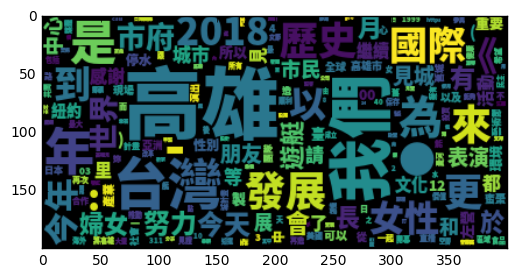

In [49]:
font = r"D:/dsc-crawling-master/Session_B/data/NotoSansCJKtc-Black.otf"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)